## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from gensim import corpora, models

In [2]:
# Load cleaned data
df = pd.read_csv("CleanedBA_Reviews.csv")

# Display the first few rows of the DataFrame to verify that it has been loaded correctly
df.head()

,Review,Stars,countries,Date,Verified,cleaned_reviews,Year,Month,Day
0,✅ Trip Verified | 4/4 flights we booked this ...,5,Germany,2023-09-06,True,flight booked holiday delayed hour wifi availa...,2023,9,6
1,✅ Trip Verified | British Airways has a total...,1,United Kingdom,2023-09-04,True,british airway total lack respect customer boo...,2023,9,4
2,"✅ Trip Verified | London Heathrow to Keflavik,...",1,Iceland,2023-09-04,True,london heathrow keflavik iceland business clas...,2023,9,4
3,✅ Trip Verified | Mumbai to London Heathrow in...,8,Iceland,2023-09-04,True,mumbai london heathrow business class ageing b...,2023,9,4
4,✅ Trip Verified | Care and support shocking. ...,8,United Kingdom,2023-09-04,True,care support shocking written previously loyal...,2023,9,4


In [4]:
df['Review'] = df['Review'].str.replace(r'.*✅ Trip Verified \| ', '', regex=True)
df.head()

,Review,Stars,countries,Date,Verified,cleaned_reviews,Year,Month,Day
0,4/4 flights we booked this holiday were delay...,5,Germany,2023-09-06,True,flight booked holiday delayed hour wifi availa...,2023,9,6
1,British Airways has a total lack of respect f...,1,United Kingdom,2023-09-04,True,british airway total lack respect customer boo...,2023,9,4
2,"London Heathrow to Keflavik, Iceland in Busine...",1,Iceland,2023-09-04,True,london heathrow keflavik iceland business clas...,2023,9,4
3,Mumbai to London Heathrow in Business Class on...,8,Iceland,2023-09-04,True,mumbai london heathrow business class ageing b...,2023,9,4
4,Care and support shocking. Written by a previ...,8,United Kingdom,2023-09-04,True,care support shocking written previously loyal...,2023,9,4


# Step 1: Calculate Average Review Score

In [5]:
# Calculate the average review score
average_score = df['Stars'].mean()
print(average_score)

4.679582302830448


# Step 2: Calculate Review Score Counts

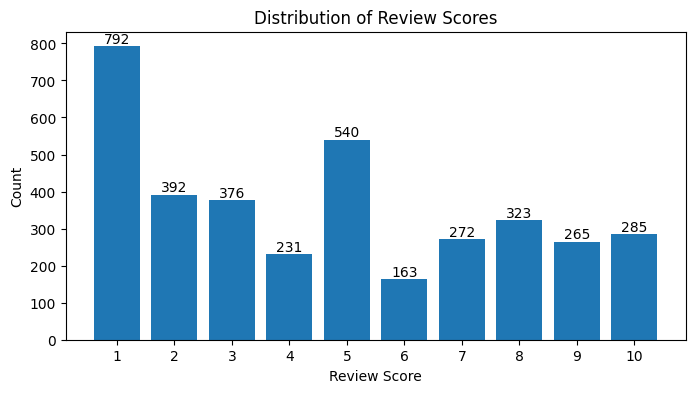

In [6]:
# Calculate review score counts
score_counts = df['Stars'].value_counts().sort_index()

# Visualize review score counts with values on each bar
plt.figure(figsize=(8, 4))
bars = plt.bar(score_counts.index.astype(str), score_counts.values)
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Review Scores')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.savefig('review_score_counts_with_values.png')

The highest number of reviewers have rated 1-star, followed by 5-stars. There are fewer reviews for higher scores.

This suggests that most customers are dissatisfied with British Airways, but there are some who had a positive experience. It is important to analyze the reviews in more detail to understand why some customers were dissatisfied.

# Step 3: Calculate Total Number of Unique Countries

In [7]:
total_unique_countries = df['countries'].nunique()
print(f'Total Number of Unique Countries: {total_unique_countries}')

Total Number of Unique Countries: 71


# Step 4: Visualize Top 5 Reviewing Countries

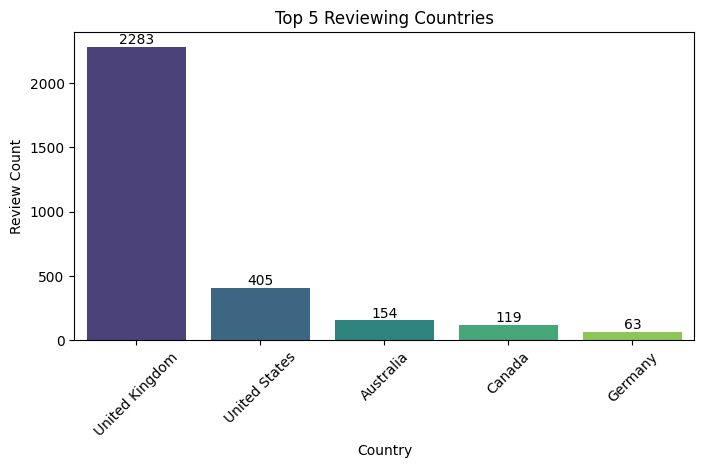

In [14]:
import seaborn as sns

# Calculate review counts by country
country_counts = df['countries'].value_counts().head(5)

# Create a Seaborn barplot for top 5 reviewing countries
plt.figure(figsize=(8, 4))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Review Count')
plt.title('Top 5 Reviewing Countries')

# Add values on top of each bar
for i, count in enumerate(country_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.savefig('top_reviewing_countries_seaborn.png')


The top 5 reviewing countries for British Airways are the United Kingdom, United States, Australia, Canada and Germany. These countries are the largest markets for British Airways, and they are also the countries where people are most likely to leave a review.

# Step 5: Visualize Top 10 Countries with Highest Average Ratings

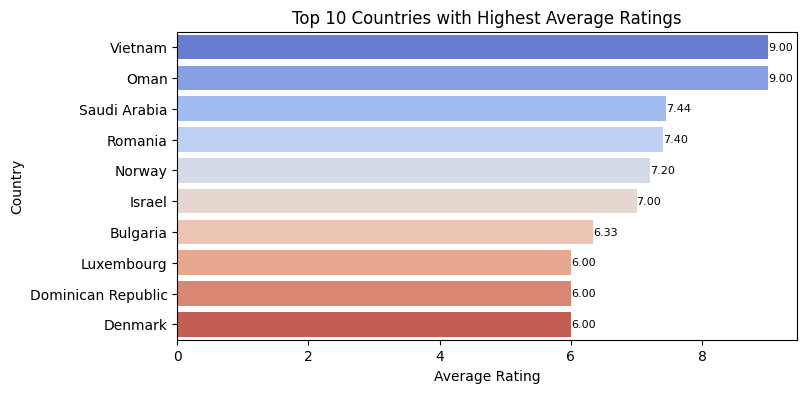

In [8]:
# Calculate average ratings by country
average_ratings_by_country = df.groupby('countries')['Stars'].mean().sort_values(ascending=False)

# Select the top 10 countries with highest average ratings
top_10_countries_ratings = average_ratings_by_country.head(10)

# Create a Seaborn barplot for the top 10 countries
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_countries_ratings.values, y=top_10_countries_ratings.index, palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Average Ratings')

# Add average rating on each bar
for i, rating in enumerate(top_10_countries_ratings.values):
    plt.text(rating, i, f'{rating:.2f}', va='center', fontsize=8)

plt.savefig('top_10_countries_average_ratings_with_values.png')

The top 10 countries with the highest average ratings for British Airways are Vietnam, Oman, Saudi Arabia, Romania, Norway, Israel, Bulgaria, Luxembourg, Czech Republic, and Denmark. These countries are the countries where customers are most satisfied with the service.

# Step 6: Time Series Analysis

In [16]:
#convert the date datatype to datetime
df['Date'] = pd.to_datetime(df['Date'])

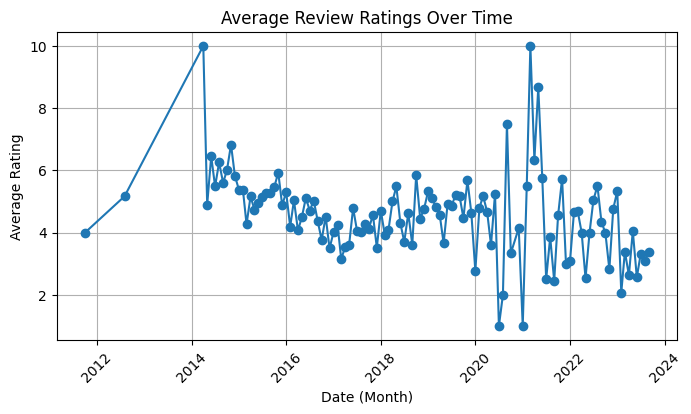

In [19]:
# Group and Aggregate Data by Month
monthly_avg_ratings = df.groupby(df['Date'].dt.to_period("M"))['Stars'].mean()

# Convert the PeriodIndex to Timestamps
monthly_avg_ratings.index = monthly_avg_ratings.index.to_timestamp()

# Create the line chart
plt.figure(figsize=(8, 4))
plt.plot(monthly_avg_ratings.index, monthly_avg_ratings.values, marker='o', linestyle='-')
plt.xlabel('Date (Month)')
plt.ylabel('Average Rating')
plt.title('Average Review Ratings Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The graph shows that the average reviews for British Airways was relatively stable from 2012 to 2019. However, the average reviews dropped significantly in 2020 and 2021. This is likely due to the COVID-19 pandemic, which caused a significant decrease in air travel.

# Step 7: Word Cloud Visualization

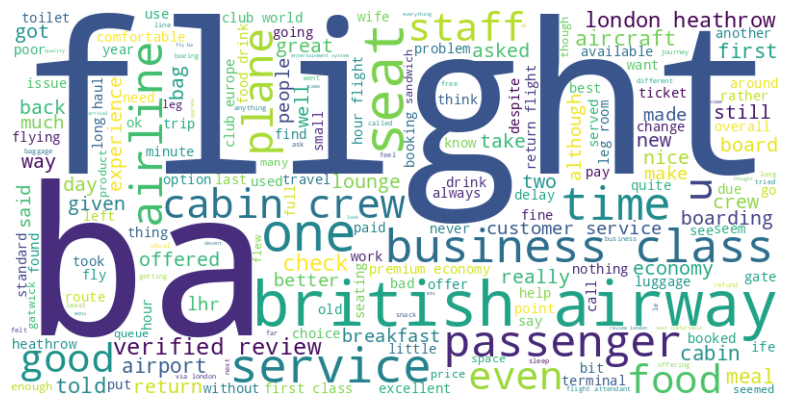

In [9]:
# Combine all cleaned reviews into a single string
all_reviews = ' '.join(df['cleaned_reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

from PIL import Image

# Display the word cloud in the notebook
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the word cloud as an image
wordcloud.to_file("wordcloud.png")

Words like "british airway', "ba", "passenger", and "flight" are all stopwords. They are commonly used in reviews of airlines, and they do not provide any information about whether the review is positive or negative. As a result, they can be excluded from the word cloud to focus on the words that are more likely to be indicative of the sentiment of the review.




In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

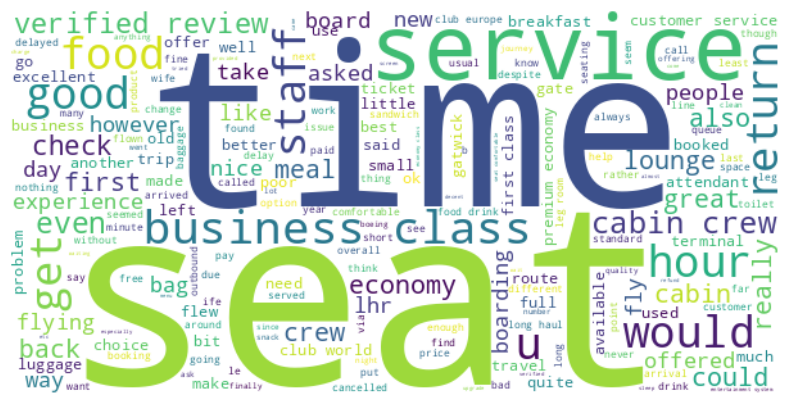

In [12]:
from nltk.corpus import stopwords

# Define custom stopwords to exclude specific words
custom_stopwords = set(["flight", "british airway", "british", "airway","british airways", "ba", "verified review", "still", "airline", "passenger", "aircraft", "one", "still", "given", "getting", "two", "london", "heathrow", "although", "took", "got", "told", "plane", "airport"])

# Combine custom stopwords with common English stopwords
stopwords = set(stopwords.words("english") + list(custom_stopwords))

# Combine all cleaned reviews into a single string
all_reviews = ' '.join(df['cleaned_reviews'])

# Generate a word cloud with custom stopwords
wordcloud = WordCloud(width=600, height=300, background_color='white', stopwords=stopwords).generate(all_reviews)

# Display the word cloud in the notebook
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the word cloud as an image
wordcloud.to_file("wordcloud.png")

The image shows a word cloud of the words that were left after removing the stopwords from the reviews. The size of the words indicates how frequently they appear in the reviews.

The largest words in the word cloud are "service", "time", and "seat". This suggests that these are the three most important topics in the reviews.

The word "service" is often used to refer to the quality of the customer service provided by the airline. The word "time" is often used to refer to the length of the flight or the amount of time it took to get through security. The word "seat" is often used to refer to the comfort of the seats on the plane.

The other words in the word cloud are also related to the customer experience, such as "food", "delay", and "luggage". This suggests that the reviews are mostly about the customer's experience with the airline, rather than the technical aspects of the flight.

Overall, the word cloud provides a good overview of the most important topics in the reviews. It can be used to identify the key areas where the airline can improve its customer service.

# Srtep 8: Word Frequency Analysis

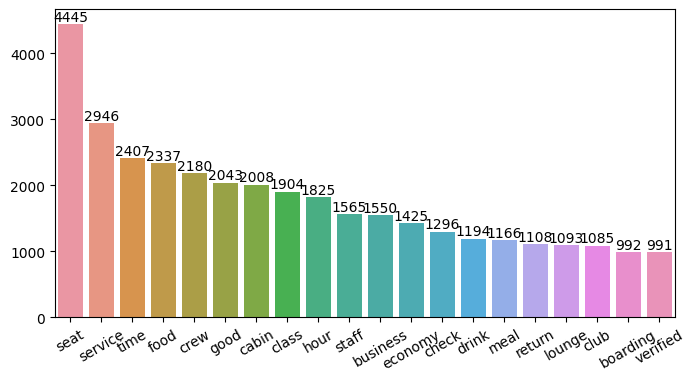

In [13]:
from nltk.probability import FreqDist
from sklearn.feature_extraction import text

# Split the text of all reviews into a list of words
words = df['cleaned_reviews'].str.split()

# Remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger", "u", "london", "airway", "british", "airline",
                                           "heathrow", "plane", "lhr", "review"])

# Create a new list of words by filtering out stopwords
new_words = [word for word_list in words for word in word_list if word not in stopwords]

# Calculate word frequencies
nlp_words = FreqDist(new_words).most_common(20)

# Create a Pandas Series of these words and their frequencies
all_fdist = pd.Series(dict(nlp_words))

# Setting figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Seaborn bar plot using Pandas attributes, with x-axis label rotation for readability
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

# Show the plot
plt.show()

The word frequency analysis provides valuable insights into the key topics discussed by customers. From the analysis, it is evident that "Seat" is the most frequently mentioned aspect of the airline, followed by "Service" and "Time." These aspects hold significant importance to customers in terms of their overall service experience. However, the analysis does not reveal the sentiment associated with these aspects, whether they are positively or negatively perceived. To gain a deeper understanding, we will employ n-gram plots to examine the context in which these terms are used and determine whether they contribute to a positive or negative customer experience.

# Word Frequency with N-gram Analysis

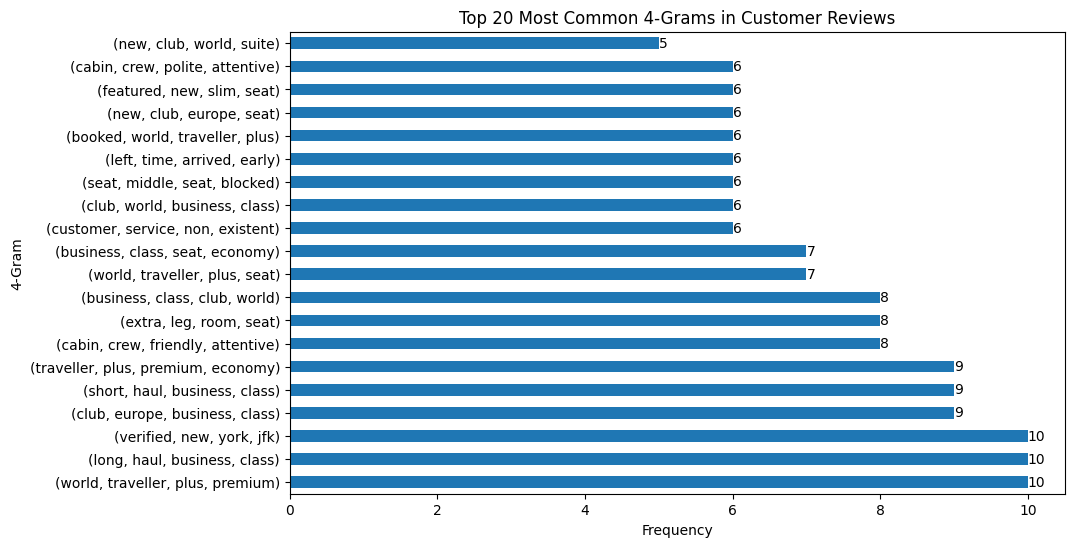

In [14]:
import nltk.collocations as collocations
from nltk import FreqDist, ngrams
import matplotlib.pyplot as plt

# Join the cleaned reviews into a single string
reviews = " ".join(df['cleaned_reviews'])

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger", "u", "london", "airway", "british", "airline",
                                           "heathrow", "plane", "lhr", "review"])

# Create a new list of words by filtering out stopwords
new_words = [word for word in words if word not in stopwords]

# Function to get n-gram frequency distribution
def get_ngram_freq_dist(tokens, n, top_n=20):
    # Generate n-grams
    ngram_list = list(ngrams(tokens, n))

    # Calculate n-gram frequencies
    ngram_freq = FreqDist(ngram_list)

    # Get the top n n-grams by frequency
    top_ngrams = ngram_freq.most_common(top_n)

    return top_ngrams

# Get the top 20 most common 4-grams
top_4grams = get_ngram_freq_dist(new_words, 4, 20)

# Create a Pandas Series of these 4-grams and their frequencies
ngram_freqdist = pd.Series(dict(top_4grams))

# Plot the top 4-grams
plt.figure(figsize=(10, 6))
ax = ngram_freqdist.plot(kind="barh")
ax.bar_label(ax.containers[0])
plt.xlabel('Frequency')
plt.ylabel('4-Gram')
plt.title('Top 20 Most Common 4-Grams in Customer Reviews')
plt.show()

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_polite_attentive, cabin_crew_friendly_attentive, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

# Sentimental Analysis using VADER:

VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, is specifically designed for social media text. It provides a compound sentiment score that can be used to classify reviews as positive, negative, or neutral.

In [7]:
import nltk

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment using VADER
def get_vader_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the VADER sentiment analysis function to each review
df['Sentiment'] = df['cleaned_reviews'].apply(get_vader_sentiment)

In [ ]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0

for i in range(len(df.corpus)):

    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [10]:
# Count the number of reviews in each sentiment category:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Positive    2436
Negative    1135
Neutral       68
Name: Sentiment, dtype: int64


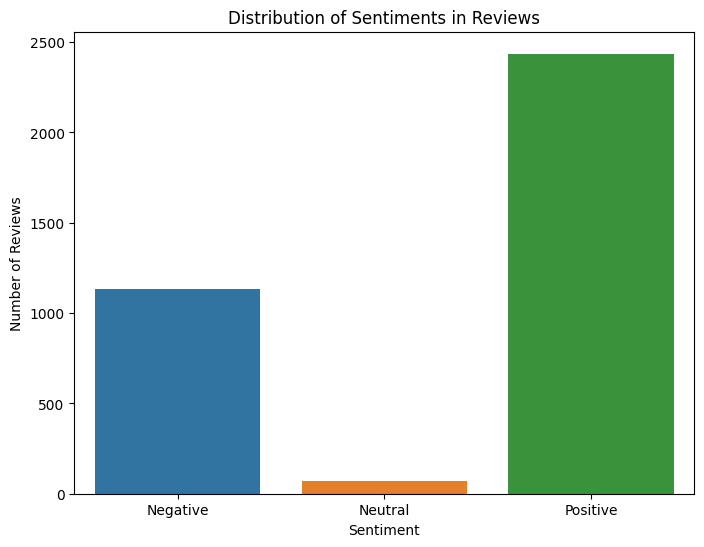

In [11]:
# Visualize the distribution of sentiments using a bar plot:

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, order=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments in Reviews')
plt.show()

The graph shows that the majority of the reviews are positive, followed by negative and neutral. This suggests that most customers are satisfied with British Airways. However, there are considerable customers who had a negative experience.

The airline can improve its customer satisfaction by addressing the concerns of the customers who had a negative experience.



In [12]:
# Calculate the percentage of positive, negative, and neutral sentiments
sentiment_percentage = sentiment_counts / len(df) * 100
print(sentiment_percentage)

Positive    66.941467
Negative    31.189887
Neutral      1.868645
Name: Sentiment, dtype: float64


The sentiment analysis results show that 66.94% of the reviews are positive, 31.19% are negative, and 1.87% are neutral.



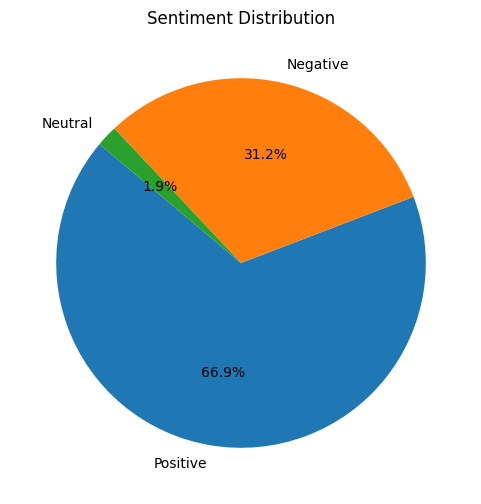

In [13]:
# Visualize sentiment percentages using a pie chart:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_percentage, labels=sentiment_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()